Вариант №10

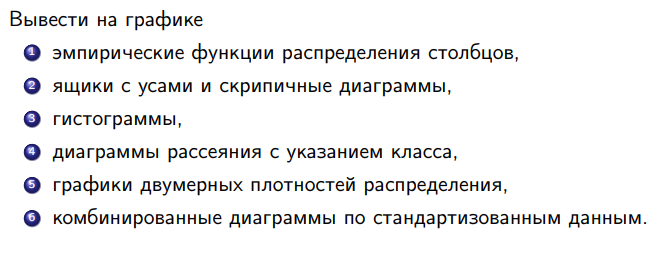
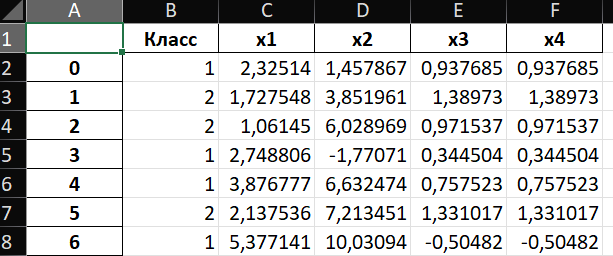

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/Лабораторная работа 4.xlsx', sheet_name='10').drop('Unnamed: 0', axis=1)
data.head(7)

,Класс,x1,x2,x3,x4
0,1,2.325140,1.457867,0.937685,0.937685
1,2,1.727548,3.851961,1.389730,1.389730
2,2,1.061450,6.028969,0.971537,0.971537
3,1,2.748806,-1.770714,0.344504,0.344504
4,1,3.876777,6.632474,0.757523,0.757523
5,2,2.137536,7.213451,1.331017,1.331017
6,1,5.377141,10.030944,-0.504819,-0.504819


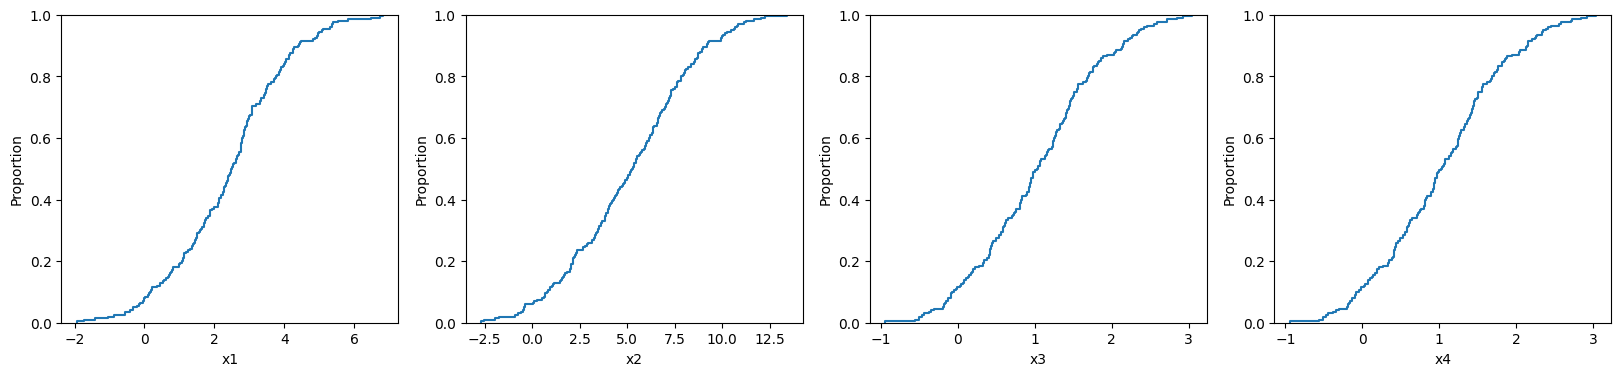

In [4]:
# Эмпирические функции распределения по столбцам
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
p1 = sns.ecdfplot(data, x=data['x1'], ax=axes[0])
p2 = sns.ecdfplot(data, x=data['x2'], ax=axes[1])
p3 = sns.ecdfplot(data, x=data['x3'], ax=axes[2])
p4 = sns.ecdfplot(data, x=data['x4'], ax=axes[3])

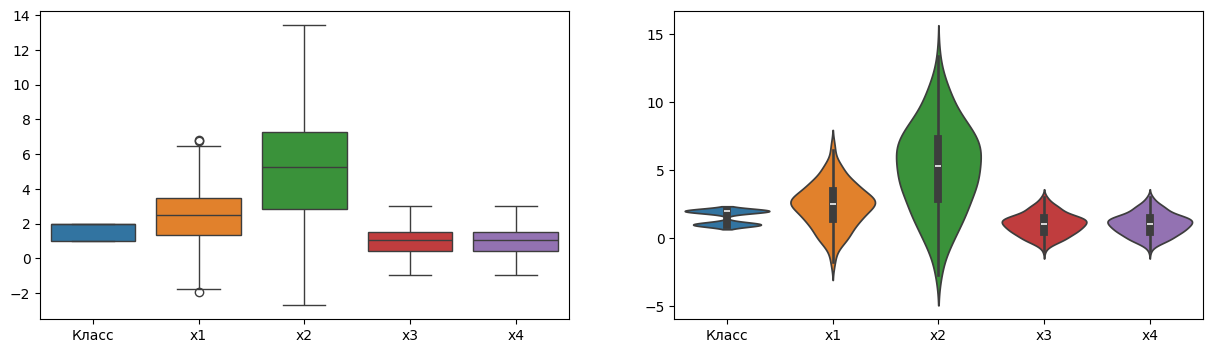

In [5]:
# ящики с усами и скрипичные диаграммы
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
p1 = sns.boxplot(data, ax=axes[0])
p2 = sns.violinplot(data , ax=axes[1])

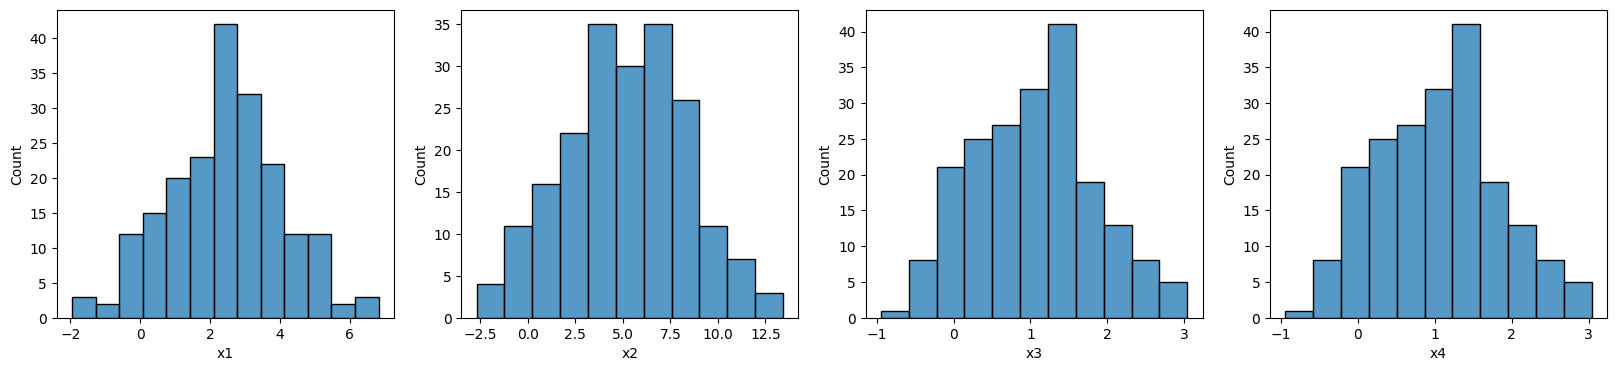

In [6]:
# гистограммы
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
p1 = sns.histplot(x=data['x1'], ax = axes[0])
p2 = sns.histplot(x=data['x2'], ax = axes[1])
p3 = sns.histplot(x=data['x3'], ax = axes[2])
p4 = sns.histplot(x=data['x4'], ax = axes[3])

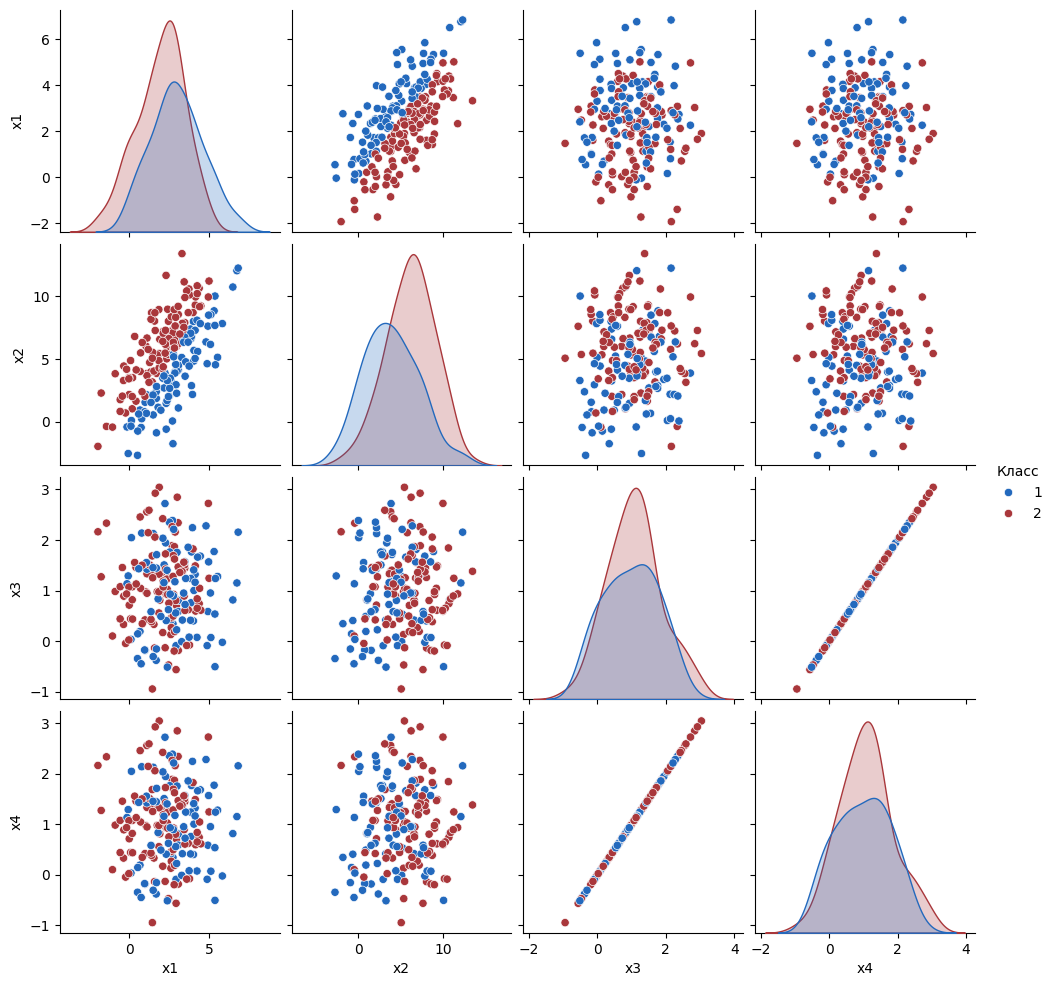

In [7]:
# диаграммы рассеяния с указанием класса
sns.pairplot(data, hue='Класс', palette='vlag')

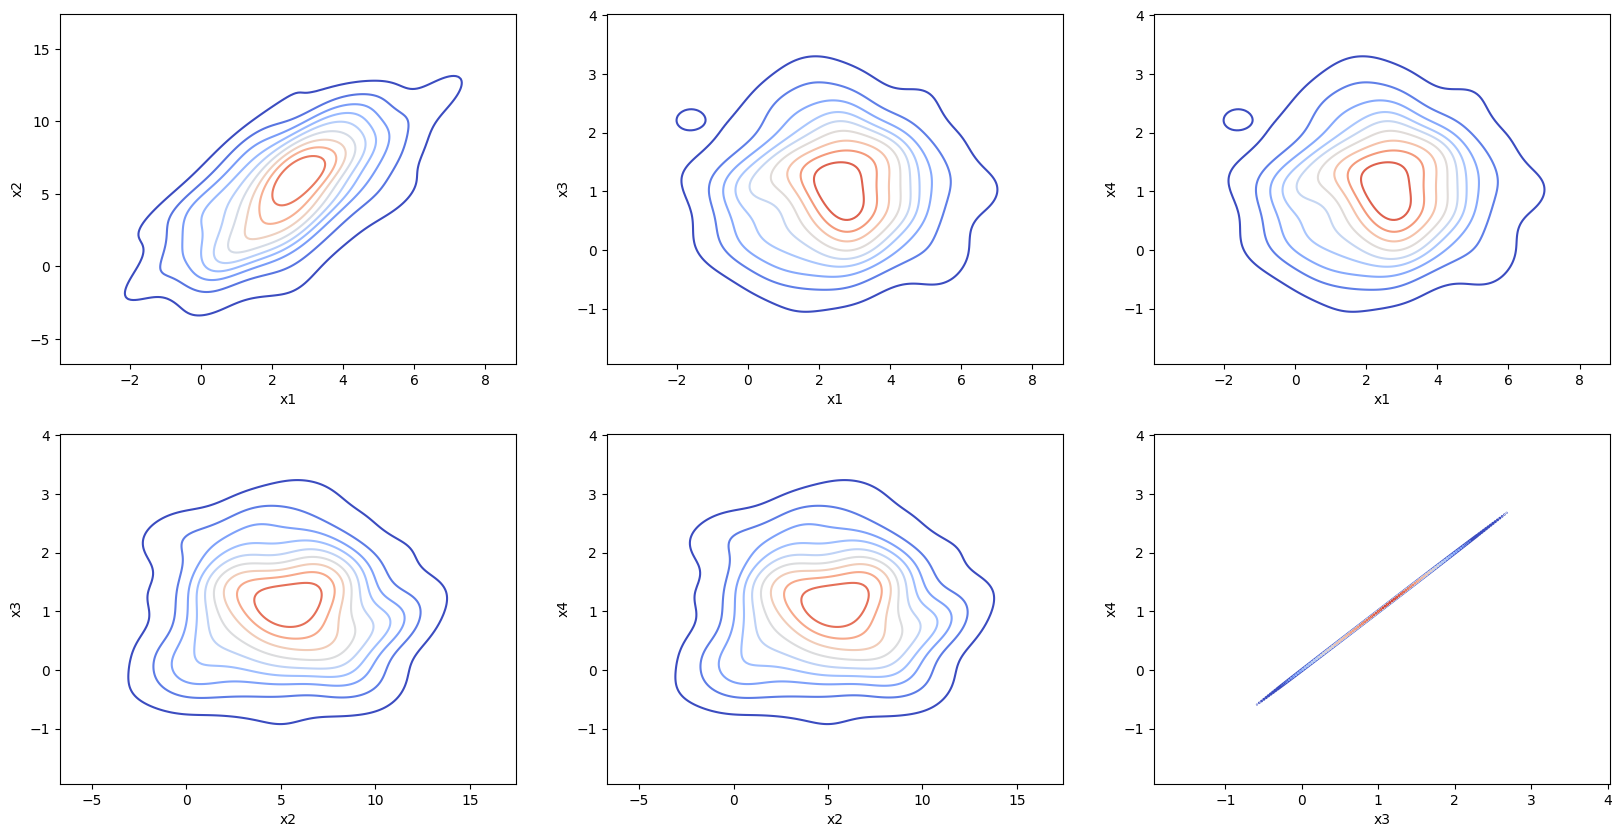

In [8]:
# графики двумерных плотностей распределения
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
p1 = sns.kdeplot(x=data['x1'], y=data['x2'], cmap="coolwarm", ax=axes[0, 0])
p2 = sns.kdeplot(x=data['x1'], y=data['x3'], cmap="coolwarm", ax=axes[0, 1])
p3 = sns.kdeplot(x=data['x1'], y=data['x4'], cmap="coolwarm", ax=axes[0, 2])
p4 = sns.kdeplot(x=data['x2'], y=data['x3'], cmap="coolwarm", ax=axes[1, 0])
p5 = sns.kdeplot(x=data['x2'], y=data['x4'], cmap="coolwarm", ax=axes[1, 1])
p6 = sns.kdeplot(x=data['x3'], y=data['x4'], cmap="coolwarm", ax=axes[1, 2])

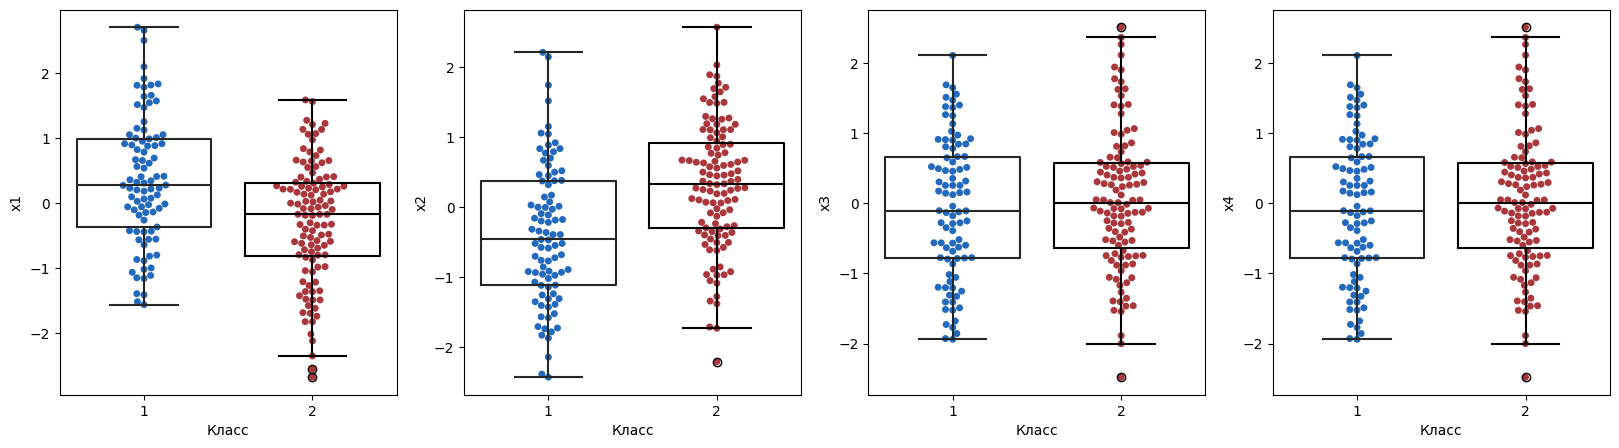

In [9]:
# комбинированные диаграммы по стандартизованным данным
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
standart_data = data['Класс'].to_frame()
for i in range(4):
    column =  f'x{i+1}'
    standart_data[column] = (data[column] - data[column].mean()) / data[column].std()
    p = sns.swarmplot(x = 'Класс', y = column, hue = 'Класс', data = standart_data, palette='vlag', legend=False, ax=axes[i])
    pp = sns.boxplot(x = 'Класс', y = column, hue = 'Класс', data = standart_data, showcaps=True, palette='dark:black', zorder=10, fill=False, legend=False, ax=axes[i])